# PCA (Principle Component Analysis):

## Example-1 (Manual Method):

In [1]:
# Import Libs
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import plotly.express as px

from sklearn.model_selection import train_test_split
from sklearn.svm import SVC


In [2]:
# Dataset
data = {
    'X': [2.3, 3.0, 1.8, 4.2, 2.6, 3.7, 1.9, 4.5, 3.4, 2.1],
    'Y': [1.2, 1.5, 0.9, 2.1, 1.3, 1.8, 1.0, 2.3, 1.7, 1.1],
    'Z': [0.5, 0.7, 0.4, 0.9, 0.6, 0.8, 0.5, 1.0, 0.7, 0.5]
}

df = pd.DataFrame(data)
df

,X,Y,Z
0,2.3,1.2,0.5
1,3.0,1.5,0.7
2,1.8,0.9,0.4
3,4.2,2.1,0.9
4,2.6,1.3,0.6
5,3.7,1.8,0.8
6,1.9,1.0,0.5
7,4.5,2.3,1.0
8,3.4,1.7,0.7
9,2.1,1.1,0.5


In [3]:
# Mean Centring / Scaling
scaler= StandardScaler()
df.iloc[:,0:3]=scaler.fit_transform(df.iloc[:,0:3])
df

,X,Y,Z
0,-0.708155,-0.643809,-0.862662
1,0.054473,0.022200,0.215666
2,-1.252890,-1.309818,-1.401826
3,1.361837,1.354219,1.293993
4,-0.381314,-0.421806,-0.323498
5,0.817102,0.688210,0.754829
6,-1.143943,-1.087815,-0.862662
7,1.688678,1.798225,1.833157
8,0.490261,0.466206,0.215666
9,-0.926049,-0.865812,-0.862662


In [4]:
# Create an interactive 3D scatter plot with Plotly
fig = px.scatter_3d(df, x='X', y='Y', z='Z', title='3D Scatter Plot')
fig.show()

In [5]:
# Step-2 (Find Covariance)
covraiance_matrix= np.cov([df.iloc[:,0],df.iloc[:,1],df.iloc[:,2]])
covraiance_matrix

array([[1.11111111, 1.10855046, 1.09648475],
       [1.10855046, 1.11111111, 1.09854359],
       [1.09648475, 1.09854359, 1.11111111]])

In [6]:
# Step-3 (Find Eigen Values & Eigen Vectors)
eigen_values, eigen_vectors=np.linalg.eig(covraiance_matrix)

In [7]:
eigen_values

array([3.31350540e+00, 2.46477813e-03, 1.73631574e-02])

In [8]:
eigen_vectors

array([[-0.57781474, -0.67233823, -0.46270015],
       [-0.57817295,  0.73732757, -0.34937671],
       [-0.5760609 , -0.0656457 ,  0.81476652]])

In [9]:
# Step-4 (Select No. of Principle Components)
pc= eigen_vectors[0:2]

In [10]:
pc

array([[-0.57781474, -0.67233823, -0.46270015],
       [-0.57817295,  0.73732757, -0.34937671]])

In [11]:
# Step-5 (Transform Data 3D to 2D)
transformed_data= np.dot(df.iloc[:,0:3],pc.T)
new_df= pd.DataFrame(transformed_data,columns=['PC1','PC2'])
new_df

,PC1,PC2
0,1.241194,0.236132
1,-0.146190,-0.090475
2,2.253204,0.248387
3,-2.296113,-0.240966
4,0.653608,0.022479
5,-1.284103,-0.228710
6,1.791521,0.160715
7,-3.032960,-0.290929
8,-0.696517,-0.015057
9,1.516357,0.198424


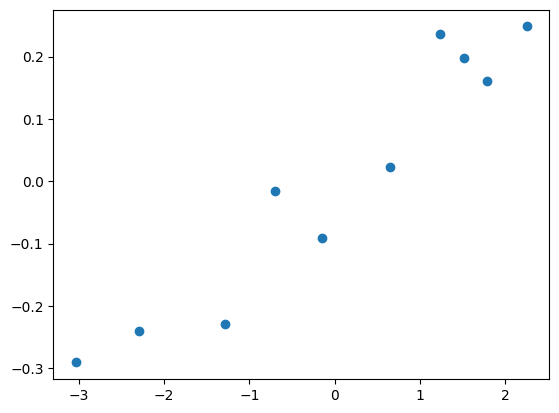

In [12]:
# Final 2D Plot 
plt.scatter(new_df['PC1'],new_df['PC2'])
plt.show()

## Example-2 (Manual Method):

In [13]:
import pandas as pd
import random

data = {
    'Feature1': [2.3, 3.0, 1.8, 4.2, 2.6, 3.7, 1.9, 4.5, 3.4, 2.1],
    'Feature2': [1.2, 1.5, 0.9, 2.1, 1.3, 1.8, 1.0, 2.3, 1.7, 1.1],
    'Feature3': [0.5, 0.7, 0.4, 0.9, 0.6, 0.8, 0.5, 1.0, 0.7, 0.5],
    'Feature4': [3.1, 2.8, 3.4, 3.9, 3.0, 3.5, 3.2, 3.7, 2.9, 3.3],
    'Feature5': [2.0, 2.2, 2.1, 2.5, 2.3, 2.4, 2.0, 2.7, 2.2, 2.1]
}

# Create a target variable
target = ['Class A', 'Class A', 'Class B', 'Class B', 'Class A', 'Class A', 'Class B', 'Class A', 'Class B', 'Class B']
random.shuffle(target)

# Add the target variable to the DataFrame
df = pd.DataFrame(data)
df['Target'] = target
df

,Feature1,Feature2,Feature3,Feature4,Feature5,Target
0,2.3,1.2,0.5,3.1,2.0,Class B
1,3.0,1.5,0.7,2.8,2.2,Class B
2,1.8,0.9,0.4,3.4,2.1,Class A
3,4.2,2.1,0.9,3.9,2.5,Class A
4,2.6,1.3,0.6,3.0,2.3,Class B
5,3.7,1.8,0.8,3.5,2.4,Class B
6,1.9,1.0,0.5,3.2,2.0,Class A
7,4.5,2.3,1.0,3.7,2.7,Class A
8,3.4,1.7,0.7,2.9,2.2,Class A
9,2.1,1.1,0.5,3.3,2.1,Class B


In [14]:
scaler= StandardScaler()
df.iloc[:,0:5]= scaler.fit_transform(df.iloc[:,0:5])
df

,Feature1,Feature2,Feature3,Feature4,Feature5,Target
0,-0.708155,-0.643809,-0.862662,-0.538816,-1.159347,Class B
1,0.054473,0.022200,0.215666,-1.436842,-0.231869,Class B
2,-1.252890,-1.309818,-1.401826,0.359211,-0.695608,Class A
3,1.361837,1.354219,1.293993,1.855921,1.159347,Class A
4,-0.381314,-0.421806,-0.323498,-0.838158,0.231869,Class B
5,0.817102,0.688210,0.754829,0.658553,0.695608,Class B
6,-1.143943,-1.087815,-0.862662,-0.239474,-1.159347,Class A
7,1.688678,1.798225,1.833157,1.257237,2.086825,Class A
8,0.490261,0.466206,0.215666,-1.137500,-0.231869,Class A
9,-0.926049,-0.865812,-0.862662,0.059868,-0.695608,Class B


In [15]:
covraiance_matrix= np.cov([df.iloc[:,0],df.iloc[:,1],df.iloc[:,2],df.iloc[:,3],df.iloc[:,4]])

In [16]:
covraiance_matrix

array([[1.11111111, 1.10855046, 1.09648475, 0.55803464, 1.01326552],
       [1.10855046, 1.11111111, 1.09854359, 0.56708164, 1.012356  ],
       [1.09648475, 1.09854359, 1.11111111, 0.55950087, 1.02790627],
       [0.55803464, 0.56708164, 0.55950087, 1.11111111, 0.69408304],
       [1.01326552, 1.012356  , 1.02790627, 0.69408304, 1.11111111]])

In [17]:
eigen_values,eigen_vectors= np.linalg.eig(covraiance_matrix)

In [18]:
eigen_values

array([4.68565034e+00, 7.43873889e-01, 1.08306526e-01, 2.30571180e-03,
       1.54190871e-02])

In [19]:
eigen_vectors

array([[-0.47607277, -0.21981363,  0.28968257, -0.66425733, -0.44708265],
       [-0.47680085, -0.20912091,  0.31634636,  0.74026867, -0.28435309],
       [-0.47661819, -0.21448585,  0.1224803 , -0.09802908,  0.83798556],
       [-0.31549865,  0.92794147,  0.19599455, -0.01416529,  0.02776162],
       [-0.46830691,  0.02951033, -0.87326611,  0.03088929, -0.12755363]])

In [20]:
# Index the eigenvalues in descending order 
sorted_indices = np.argsort(eigen_values)[::-1]
# Sort the eigenvalues in descending order
sorted_eigenvalues = eigen_values[sorted_indices]
# sort the corresponding eigenvectors accordingly
sorted_eigenvectors = eigen_vectors[:, sorted_indices]

In [21]:
(sorted_eigenvalues).round(2)

array([4.69, 0.74, 0.11, 0.02, 0.  ])

In [22]:
sorted_eigenvectors

array([[-0.47607277, -0.21981363,  0.28968257, -0.44708265, -0.66425733],
       [-0.47680085, -0.20912091,  0.31634636, -0.28435309,  0.74026867],
       [-0.47661819, -0.21448585,  0.1224803 ,  0.83798556, -0.09802908],
       [-0.31549865,  0.92794147,  0.19599455,  0.02776162, -0.01416529],
       [-0.46830691,  0.02951033, -0.87326611, -0.12755363,  0.03088929]])

In [23]:
pc= sorted_eigenvectors[:,0:2]

In [24]:
pc

array([[-0.47607277, -0.21981363],
       [-0.47680085, -0.20912091],
       [-0.47661819, -0.21448585],
       [-0.31549865,  0.92794147],
       [-0.46830691,  0.02951033]])

In [25]:
new_df= projected_data = np.dot(df.iloc[:, 0:5], pc[:, :2])  # Using the first 2 PCs
new_df = pd.DataFrame(projected_data, columns=['PC1', 'PC2'])

In [26]:
new_df['Target']= df['Target']

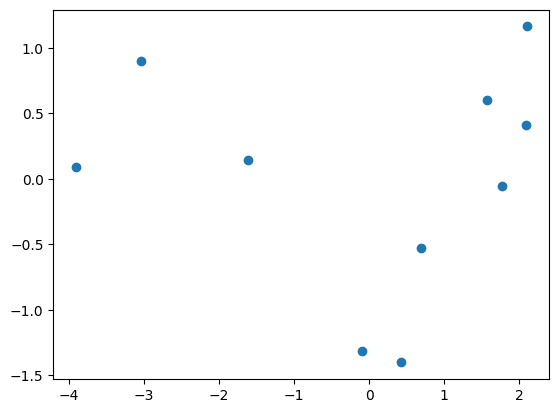

In [27]:
plt.scatter(new_df['PC1'],new_df['PC2'])
plt.show()

## Example 3 (Manual Method):

In [28]:

# Here we are using inbuilt dataset of scikit learn
from sklearn.datasets import load_breast_cancer

# instantiating
cancer = load_breast_cancer(as_frame=True)
# creating dataframe
df = cancer.frame

# checking shape
print('Original Dataframe shape :',df.shape)

# Input features
X = df[cancer['feature_names']]
print('Inputs Dataframe shape :', X.shape)


Original Dataframe shape : (569, 31)
Inputs Dataframe shape : (569, 30)


In [29]:
y= df['target']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)
model= SVC()
model.fit(X_train,y_train)
model.score(X_test,y_test)


0.9473684210526315

In [30]:
scaler= StandardScaler()
X.iloc[:,:30]=scaler.fit_transform(X.iloc[:,:30])

C:\Users\Shorya Sharma\AppData\Local\Temp\ipykernel_11112\2990642078.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [31]:
covariance_matrix= X.cov()

In [32]:
eigen_values,eigen_vectors= np.linalg.eig(covariance_matrix)

In [33]:
(eigen_values).round(1)

array([13.3,  5.7,  2.8,  2. ,  1.7,  1.2,  0.7,  0.5,  0.4,  0.4,  0.3,
        0.3,  0.2,  0.2,  0.1,  0.1,  0.1,  0.1,  0. ,  0. ,  0. ,  0. ,
        0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ])

In [34]:
idx= np.argsort(eigen_values)[::-1]
sorted_eigenvalues= eigen_values[idx]
sorted_eigenvectors= eigen_vectors[:,idx]

In [35]:
(sorted_eigenvalues).round(1)

array([13.3,  5.7,  2.8,  2. ,  1.7,  1.2,  0.7,  0.5,  0.4,  0.4,  0.3,
        0.3,  0.2,  0.2,  0.1,  0.1,  0.1,  0.1,  0. ,  0. ,  0. ,  0. ,
        0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ])

In [36]:
pc= sorted_eigenvectors[:,0:5]

In [37]:
transformed_data= np.dot(df.iloc[:,0:-1],pc[:,0:5])
new_df= pd.DataFrame(transformed_data,columns=['PC1','PC2','PC3','PC4','PC5'])
new_df

,PC1,PC2,PC3,PC4,PC5
0,793.364674,-772.386400,28.693570,114.456637,61.498704
1,831.376304,-819.573038,21.695304,113.079259,46.296461
2,751.111800,-737.924156,26.218798,98.643829,44.035575
3,271.973741,-262.394926,4.912013,14.387632,15.271273
4,741.248858,-730.596479,30.886047,110.336027,38.163621
...,...,...,...,...,...
564,904.399203,-887.916357,44.709909,128.359133,58.179018
565,772.937544,-758.802048,29.407552,90.168986,46.543022
566,522.486870,-512.141833,15.075822,48.895637,27.853743
567,801.865190,-785.872631,23.540833,91.031488,46.660824


In [38]:
X= new_df
y= df['target']

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [40]:
model= SVC()
model.fit(X_train,y_train)
model.score(X_test,y_test)

0.9473684210526315